#Fire up graphlab create

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib

import matplotlib.pyplot as plt

#Load some house sales data

Dataset is from house sales in King County, the region where the city of Seattle, WA is located.

In [3]:
sales = pd.read_csv("/Users/yananli/Desktop/UWashington/1.Machine Learning Foundations/Week 2/HW/home_data.csv")

In [55]:
sales

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500,3,1.00,1780,7470,1.0,0,0,...,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000,3,2.50,1890,6560,2.0,0,0,...,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


#Exploring the data for housing sales 

The house price is correlated with the number of square feet of living space.

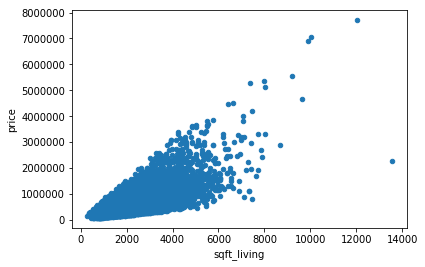

In [56]:
sales.plot.scatter(x="sqft_living", y='price')

In [57]:
#sales.show(view='BoxWhisker Plot', x='zipcode', y='price')

Pull the bar at the bottom to view more of the data.  

98039 is the most expensive zip code.

#Build a regression model with more features

In [58]:
sales[sales.zipcode == 98039].price.mean()

2160606.6

In [59]:
sales[(sales.sqft_living > 2000) & (sales.sqft_living <= 4000)].shape[0] / sales.shape[0]

0.42187572294452413

In [5]:
my_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode']

In [61]:
advanced_features = [
'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode',
'condition', # condition of house				
'grade', # measure of quality of construction				
'waterfront', # waterfront property				
'view', # type of view				
'sqft_above', # square feet above ground				
'sqft_basement', # square feet in basement				
'yr_built', # the year built				
'yr_renovated', # the year renovated				
'lat', 'long', # the lat-long of the parcel				
'sqft_living15', # average sq.ft. of 15 nearest neighbors 				
'sqft_lot15', # average lot size of 15 nearest neighbors 
]

In [62]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

regr = linear_model.LinearRegression()

feature_train, feature_test, price_train, price_test = train_test_split(sales[my_features], sales.price, test_size=0.2, random_state=0)

regr.fit(feature_train, price_train)
price_pred = regr.predict(feature_test)
print('Coefficients: \n', regr.coef_)
print("Root Mean squared error: %.2f" % (mean_squared_error(price_test, price_pred)**0.5))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(price_test, price_pred))


Coefficients: 
 [-5.66006330e+04  1.10870936e+04  3.20408369e+02 -2.89499140e-01
 -2.41800491e+03  6.17971071e+02]
Root Mean squared error: 244004.77
Variance score: 0.50


In [63]:
feature_train, feature_test, price_train, price_test = train_test_split(sales[advanced_features], sales.price, test_size=0.2, random_state=0)

regr.fit(feature_train, price_train)
price_pred = regr.predict(feature_test)
print('Coefficients: \n', regr.coef_)
print("Root Mean squared error: %.2f" % (mean_squared_error(price_test, price_pred)**0.5))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(price_test, price_pred))


Coefficients: 
 [-3.46742831e+04  3.94310007e+04  1.12610340e+02  1.75888737e-01
  7.42456845e+03 -5.67468805e+02  2.61695183e+04  9.35901502e+04
  6.05600529e+05  5.27368893e+04  7.27875901e+01  3.98227501e+01
 -2.60713698e+03  2.01053038e+01  6.04865961e+05 -2.22392029e+05
  2.42333853e+01 -4.67450072e-01]
Root Mean squared error: 190473.38
Variance score: 0.69


In [64]:
print("RMSE Difference is: " + str(244004.77 - 190473.38))

RMSE Difference is: 53531.389999999985
